In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="2"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'ORnetbin2d47V1.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 47
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='ORnetbin2d47V1.h5', batch_size=100, box_vector=5, categories=4, depth=47, epochs=250, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=5, residual=True, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 9)
loading weights
(36076, 1, 1, 29) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 86s 2ms/step - loss: 3.8576 - acc: 7.7614e-04 - val_loss: 3.8411 - val_acc: 0.0011

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.841060539871344, 'val_acc': 0.001053185863768571, 'loss': 3.857641760136365, 'acc': 0.0007761392442108668, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

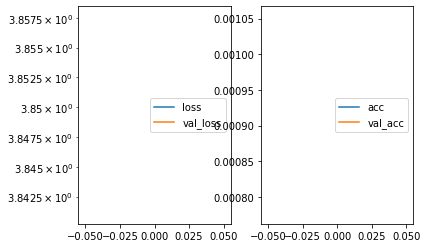

Predicted cell: MacroCheate Probability: [[0.71626025]]
True Cell type: MacroCheate
X [[0.2217691]]
True positional value X 0.3148148148148148
Y [[0.46421868]]
True positional value Y 0.3148148148148148
H [[0.36971083]]
True positional value H 0.4444444444444444
W [[0.4980293]]
True positional value W 0.5
C [[0.5947361]]
True positional value C 1.0


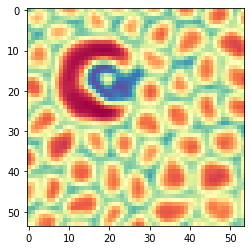

Epoch 2/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.7676 - acc: 0.0012 - val_loss: 3.7679 - val_acc: 0.0026

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.7679295797232517, 'val_acc': 0.0026329646594214274, 'loss': 3.7675716081285757, 'acc': 0.0012196473837599335, 'lr': 1e-06}


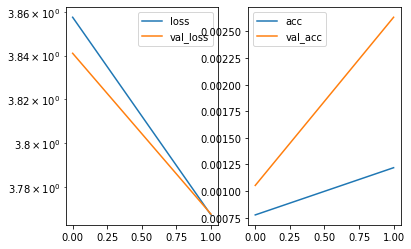

Predicted cell: MacroCheate Probability: [[0.5693776]]
True Cell type: MatureP1
X [[0.555457]]
True positional value X 0.5
Y [[0.39722064]]
True positional value Y 0.3148148148148148
H [[0.37073952]]
True positional value H 0.2222222222222222
W [[0.5045091]]
True positional value W 0.2962962962962963
C [[0.6549945]]
True positional value C 1.0


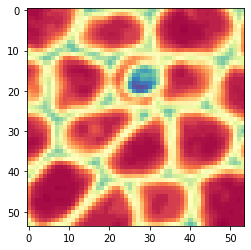

Epoch 3/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.6824 - acc: 0.0021 - val_loss: 3.7024 - val_acc: 0.0032

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.7024169487975787, 'val_acc': 0.003159557591305713, 'loss': 3.682350651416087, 'acc': 0.0020789444049623485, 'lr': 1e-06}


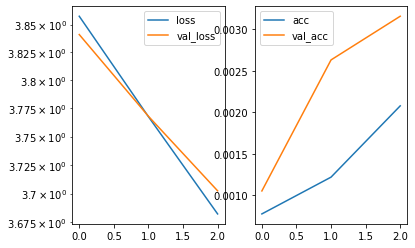

Predicted cell: MacroCheate Probability: [[0.42858344]]
True Cell type: MatureP1
X [[0.50078446]]
True positional value X 0.3148148148148148
Y [[0.42602545]]
True positional value Y 0.5
H [[0.5979106]]
True positional value H 0.3148148148148148
W [[0.5252807]]
True positional value W 0.3148148148148148
C [[0.6536399]]
True positional value C 1.0


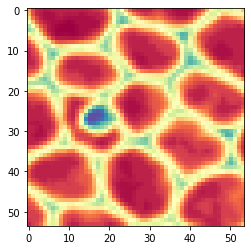

Epoch 4/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.6071 - acc: 0.0029 - val_loss: 3.6433 - val_acc: 0.0032

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.6433293004610965, 'val_acc': 0.003159557591305713, 'loss': 3.6071480175967436, 'acc': 0.0029105221657907505, 'lr': 1e-06}


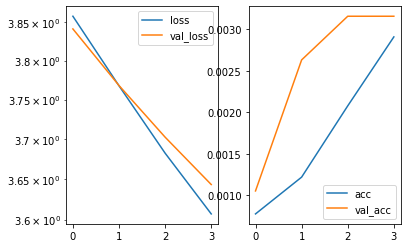

Predicted cell: MacroCheate Probability: [[0.71341044]]
True Cell type: MacroCheate
X [[0.6083604]]
True positional value X 0.6851851851851852
Y [[0.30223027]]
True positional value Y 0.3148148148148148
H [[0.40130752]]
True positional value H 0.37037037037037035
W [[0.42894387]]
True positional value W 0.46296296296296297
C [[0.5501596]]
True positional value C 1.0


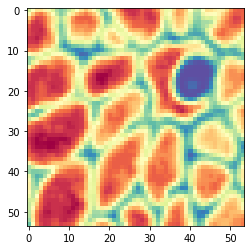

Epoch 5/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.5397 - acc: 0.0045 - val_loss: 3.5911 - val_acc: 0.0032

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.591132396393666, 'val_acc': 0.003159557591305713, 'loss': 3.5396592424851403, 'acc': 0.0045182391716561176, 'lr': 1e-06}


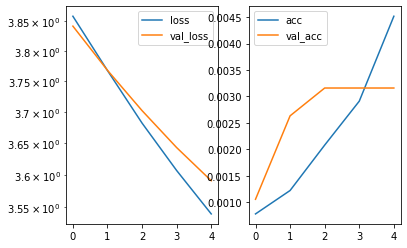

Predicted cell: MacroCheate Probability: [[0.43524382]]
True Cell type: NonMatureP1
X [[0.46684667]]
True positional value X 0.5
Y [[0.5340234]]
True positional value Y 0.6851851851851852
H [[0.43604118]]
True positional value H 0.42592592592592593
W [[0.4193705]]
True positional value W 0.3888888888888889
C [[0.6465289]]
True positional value C 1.0


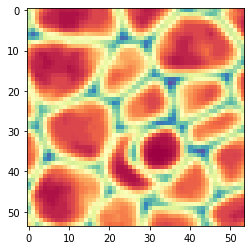

Epoch 6/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.4770 - acc: 0.0073 - val_loss: 3.5428 - val_acc: 0.0068

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.542830558247539, 'val_acc': 0.006845708125775553, 'loss': 3.4769745898466176, 'acc': 0.007290165044663882, 'lr': 1e-06}


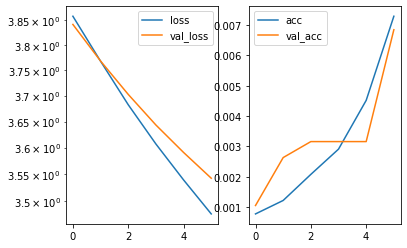

Predicted cell: MacroCheate Probability: [[0.34618592]]
True Cell type: MacroCheate
X [[0.5321183]]
True positional value X 0.6851851851851852
Y [[0.4497426]]
True positional value Y 0.3148148148148148
H [[0.6234342]]
True positional value H 0.4074074074074074
W [[0.3445469]]
True positional value W 0.4074074074074074
C [[0.656744]]
True positional value C 1.0


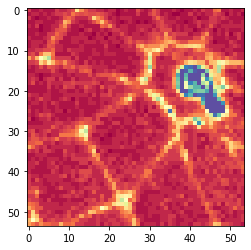

Epoch 7/250
36076/36076 [==============================] - 74s 2ms/step - loss: 3.4221 - acc: 0.0107 - val_loss: 3.4986 - val_acc: 0.0137

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/ORnetbin2d47V1.h5
{'val_loss': 3.49857056184842, 'val_acc': 0.013691416338356844, 'loss': 3.422088623787059, 'acc': 0.01069963387178435, 'lr': 1e-06}


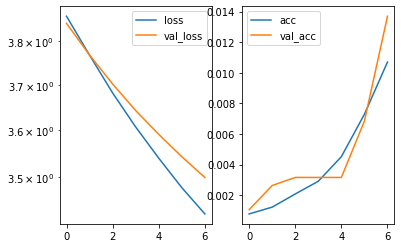

Predicted cell: MatureP1 Probability: [[0.4517651]]
True Cell type: MatureP1
X [[0.39984772]]
True positional value X 0.5
Y [[0.4584584]]
True positional value Y 0.5
H [[0.5532449]]
True positional value H 0.4444444444444444
W [[0.44006327]]
True positional value W 0.42592592592592593
C [[0.6726445]]
True positional value C 1.0


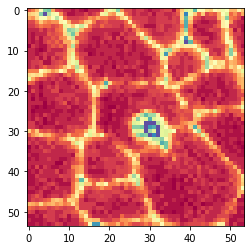

Epoch 8/250
 7000/36076 [====>.........................] - ETA: 58s - loss: 3.3738 - acc: 0.0133

KeyboardInterrupt: 

In [5]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
